# Projeto 1

Renato Yasuo Chopard Tajima 2B


# Pergunta

Os avanços no setor da comunicação e do transporte, como do crescimento percentual do número de usuários na internet e de veículos terrestres (carros, ônibus e caminhões) de um país, tende a se relacionar com o IDH?

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import math as math
from scipy import stats
import matplotlib.pyplot as plt
import os
print(os.getcwd())
import seaborn as sns

C:\Users\User\Desktop\Projeto 1 - CD


# Abrindo os dados

# Índice de Desenvolvimento Humano

Dados retirados do site https://www.gapminder.org/data/

In [2]:
hdi = pd.read_excel('hdi_human_development_index.xlsx')
hdi.head()

,geo,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Afghanistan,0.295,0.300,0.309,0.305,0.300,0.324,0.328,0.332,0.335,...,0.415,0.433,0.434,0.448,0.454,0.463,0.470,0.476,0.479,0.479
1,Albania,0.635,0.618,0.603,0.608,0.616,0.628,0.637,0.636,0.646,...,0.703,0.713,0.721,0.725,0.738,0.752,0.759,0.761,0.762,0.764
2,Algeria,0.577,0.581,0.587,0.591,0.595,0.600,0.609,0.617,0.627,...,0.690,0.697,0.705,0.714,0.724,0.732,0.737,0.741,0.743,0.745
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.819,0.819,0.843,0.850,0.857,0.858
4,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.454,0.468,0.480,0.488,0.495,0.508,0.523,0.527,0.531,0.533


Corrigindo o índice

In [3]:
hdi_index = hdi.set_index("geo")
hdi_index.head()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
geo,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.295,0.300,0.309,0.305,0.300,0.324,0.328,0.332,0.335,0.338,...,0.415,0.433,0.434,0.448,0.454,0.463,0.470,0.476,0.479,0.479
Albania,0.635,0.618,0.603,0.608,0.616,0.628,0.637,0.636,0.646,0.656,...,0.703,0.713,0.721,0.725,0.738,0.752,0.759,0.761,0.762,0.764
Algeria,0.577,0.581,0.587,0.591,0.595,0.600,0.609,0.617,0.627,0.636,...,0.690,0.697,0.705,0.714,0.724,0.732,0.737,0.741,0.743,0.745
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.819,0.819,0.843,0.850,0.857,0.858
Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.382,...,0.454,0.468,0.480,0.488,0.495,0.508,0.523,0.527,0.531,0.533


# Internet Users (%)

Dados retirados do site https://www.gapminder.org/data/


In [4]:
internet_users = pd.read_excel('internet_users.xlsx')
internet_users.head()

,geo,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.90,1.84,3.55,4.0,5.0,5.45,5.9,7.0,8.26,10.6
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,15.00,23.90,41.20,45.0,49.0,54.70,57.2,60.1,63.30,66.4
2,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.45,10.20,11.20,12.5,14.9,18.20,22.5,29.5,38.20,42.9
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,70.90,70.00,78.50,81.0,81.0,86.40,94.0,95.9,96.90,97.9
4,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.70,1.90,2.30,2.8,3.1,6.50,8.9,10.2,12.40,13.0


Corrigindo o índice

In [5]:
internet_users_index = internet_users.set_index("geo")
internet_users_index.head()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
geo,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.90,1.84,3.55,4.0,5.0,5.45,5.9,7.0,8.26,10.6
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,15.00,23.90,41.20,45.0,49.0,54.70,57.2,60.1,63.30,66.4
Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.45,10.20,11.20,12.5,14.9,18.20,22.5,29.5,38.20,42.9
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,70.90,70.00,78.50,81.0,81.0,86.40,94.0,95.9,96.90,97.9
Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.70,1.90,2.30,2.8,3.1,6.50,8.9,10.2,12.40,13.0


# Cars, trucks and buses per 1000 persons

Dados retirados do site https://www.gapminder.org/data/


In [6]:
transp = pd.read_excel('cars_trucks_and_buses_per_1000_persons.xlsx')
transp.head()

,geo,2002,2003,2004,2005,2006,2007
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,22.8
1,Albania,73.0,NaN,85.0,87.5,97.3,102.0
2,Algeria,NaN,88.0,89.0,91.0,NaN,NaN
3,Angola,NaN,NaN,NaN,NaN,NaN,39.6
4,Argentina,NaN,NaN,NaN,NaN,NaN,314.0


Corrigindo o índice

In [7]:
transp_index = transp.set_index("geo")
transp_index.head()

,2002,2003,2004,2005,2006,2007
geo,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN,22.8
Albania,73.0,NaN,85.0,87.5,97.3,102.0
Algeria,NaN,88.0,89.0,91.0,NaN,NaN
Angola,NaN,NaN,NaN,NaN,NaN,39.6
Argentina,NaN,NaN,NaN,NaN,NaN,314.0


# Selecionando o ano a ser analisado

 O ano a ser analisado é o de 2007


In [8]:
#IDH
hdi_2007 = hdi_index[[2007]]
hdi_2007.head() 

,2007
geo,
Afghanistan,0.433
Albania,0.713
Algeria,0.697
Andorra,NaN
Angola,0.468


In [9]:
#Internet users
iu_2007 = internet_users_index[[2007]]
iu_2007.head()

,2007
geo,
Afghanistan,1.90
Albania,15.00
Algeria,9.45
Andorra,70.90
Angola,1.70


In [10]:
#Transporte
transp_2007 = transp_index[[2007]]
transp_2007.head()

,2007
geo,
Afghanistan,22.8
Albania,102.0
Algeria,NaN
Angola,39.6
Argentina,314.0


# Data Frame


In [16]:
df = pd.DataFrame()
df = hdi_2007.join(iu_2007, lsuffix='_IDH', rsuffix='_Internet_Users')
df.head()

,2007_IDH,2007_Internet_Users
geo,,
Afghanistan,0.433,1.90
Albania,0.713,15.00
Algeria,0.697,9.45
Andorra,NaN,70.90
Angola,0.468,1.70


In [17]:
df2 = df.join(transp_2007,how="inner")
df2.head()

,2007_IDH,2007_Internet_Users,2007
geo,,,
Afghanistan,0.433,1.90,22.8
Albania,0.713,15.00,102.0
Algeria,0.697,9.45,NaN
Angola,0.468,1.70,39.6
Argentina,0.792,25.90,314.0


"2007" refere-se a coluna do transporte

In [18]:
df2 = df2.dropna(axis='index')
df2.head()

,2007_IDH,2007_Internet_Users,2007
geo,,,
Afghanistan,0.433,1.90,22.8
Albania,0.713,15.00,102.0
Angola,0.468,1.70,39.6
Argentina,0.792,25.90,314.0
Armenia,0.721,6.02,105.0


In [19]:
df2.to_csv("DataFram1.csv")
DataFrame1 = pd.read_csv("DataFram1.csv")

# Cruzando os Dados do ano de 2007


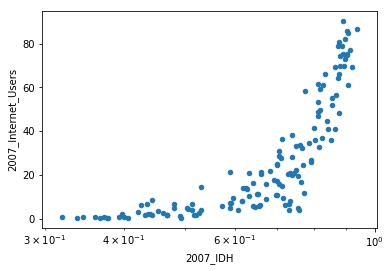

In [20]:
DataFrame1.plot.scatter(x="2007_IDH", y = "2007_Internet_Users",  logx=True)

Ao cruzarmos os dados entre o número percentual de usuários de Internet de cada país e do IDH, percebemos que exite uma tendência para que os países que apresentam um maior IDH terem um maior número de usuários na Internet.

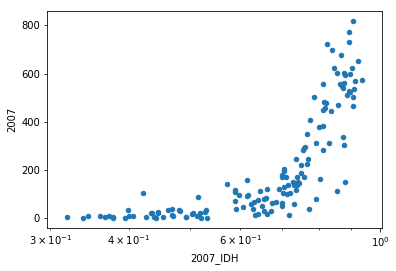

In [21]:
DataFrame1.plot.scatter(x="2007_IDH", y = "2007",  logx=True)

Ao cruzarmos os dados entre o número de carros, ônibus e caminhões (por 1000 pessoas) e do IDH, percebemos que exite uma tendência para que os países que apresentam um maior IDH terem um maior número desses veículos.

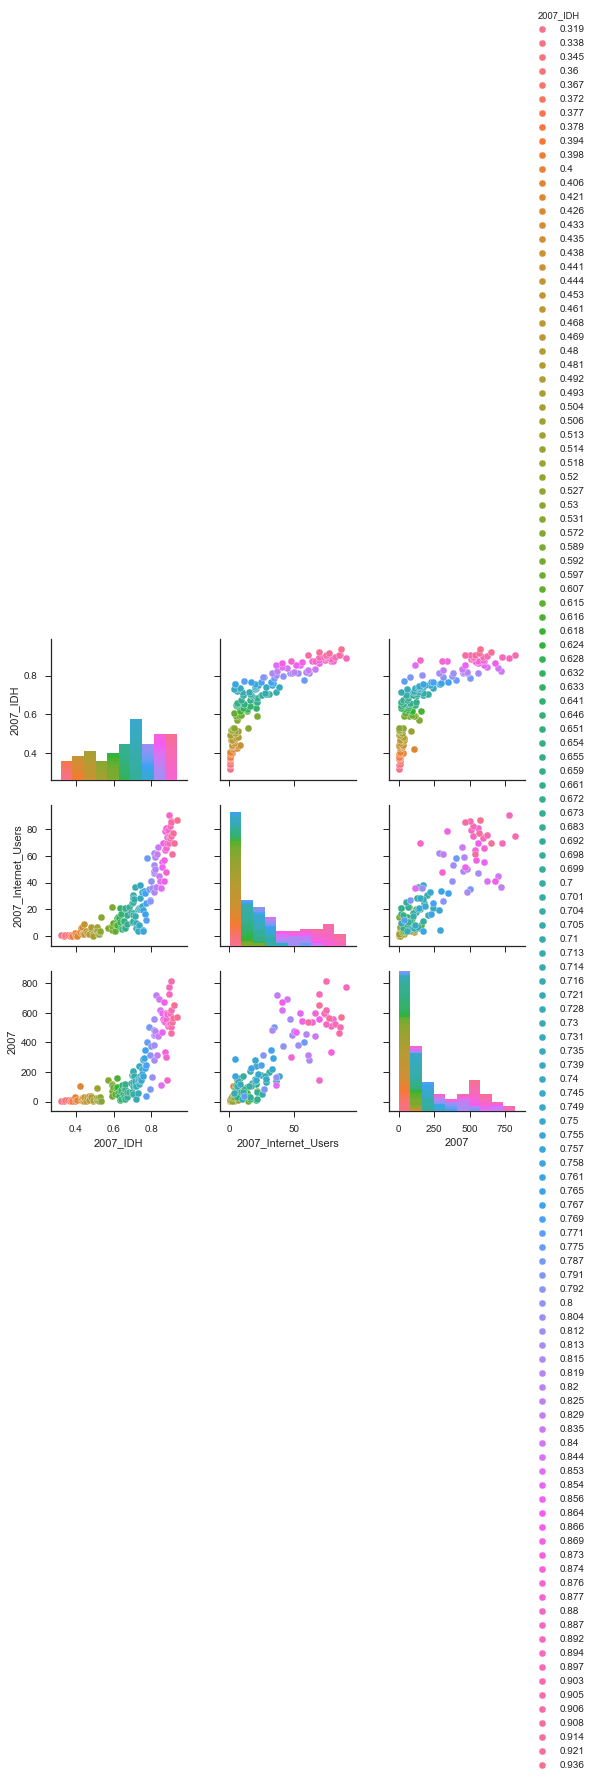

In [23]:
sns.set(style="ticks")

sns.pairplot(df2,hue="2007_IDH")#, hue="origin")#, x_vars=x_vars, y_vars=y_vars)

Ao observamos esses últimos gráficos, podemos ver que os três atributos tendem a se relacionar de uma maneira sólida.

# Retas de Tendências

In [24]:
#Função
def reta(dados_x, dados_y):    
    a = dados_y.cov(dados_x) / dados_x.var()
    b = dados_y.mean() - a*dados_x.mean()
 
    print('Ajuste linear entre X3 e X4:')
    print('Coeficiente linear:', b)
    print('Coeficiente angular:', a)
 
    fig = plt.figure(figsize=(8, 6))
    plt.scatter(dados_x, dados_y, c='red', alpha=0.8)
    plt.title('x versus y')
    plt.xlabel('eixo x')
    plt.ylabel('eixo y')
 
    plt.plot((dados_x.min(), dados_x.max()), (a*dados_x.min()+b, a*dados_x.max()+b), color='blue')
 
    plt.tight_layout()
    plt.show()

Primeiro vamos correlacionar o número percentual de usuários na internet e o IDH para ver se existe alguma correlação entre esses dois elemenetos.

Ajuste linear entre X3 e X4:
Coeficiente linear: -62.46200881027181
Coeficiente angular: 131.6363918356012


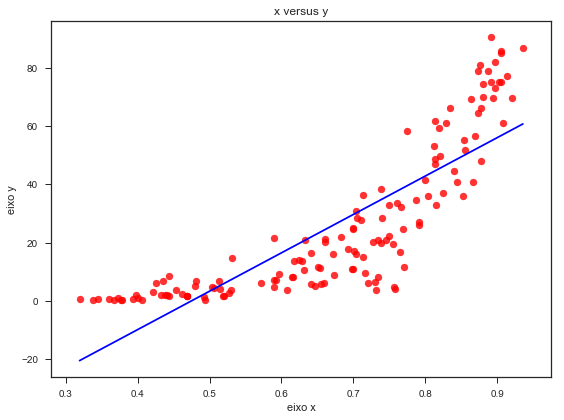

In [27]:
reta(df2['2007_IDH'], df2['2007_Internet_Users'])

Ajuste linear entre X3 e X4:
Coeficiente linear: -3.031554995814522
Coeficiente angular: 8.210438273587446


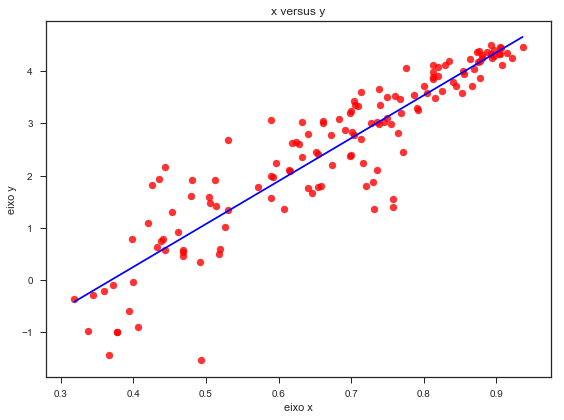

In [34]:
reta(df2['2007_IDH'], np.log(df2['2007_Internet_Users']))

In [29]:
df2['2007_IDH'].corr(df2['2007_Internet_Users'])

0.8368177913572917

Agora vamos correlacionar o número de carros, ônibus e caminhões para cada 1000 pessoas com o IDH para observar se eles possuem um comportamento semelhante a correlação anterior

Ajuste linear entre X3 e X4:
Coeficiente linear: -517.4672593938292
Coeficiente angular: 1080.5349450099402


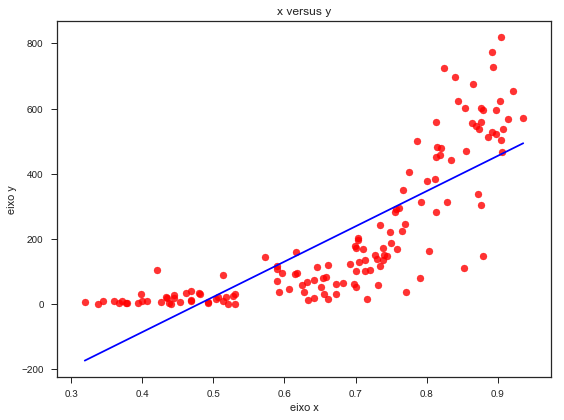

In [32]:
reta(df2['2007_IDH'], df2[2007])

Ajuste linear entre X3 e X4:
Coeficiente linear: -1.4227307089804455
Coeficiente angular: 8.730906844202686


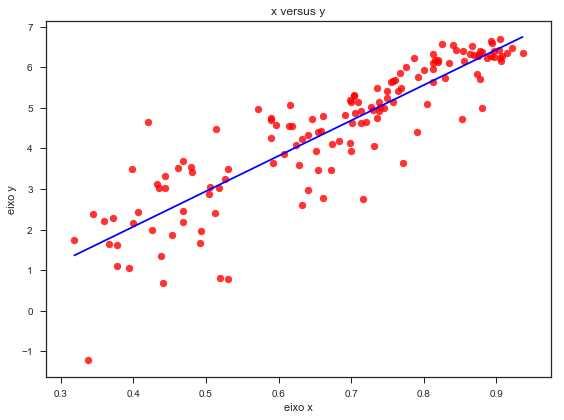

In [36]:
reta(df2['2007_IDH'], np.log(df2[2007]))

In [33]:
df2['2007_IDH'].corr(df2[2007])

0.8062395823637306

Ao analisarmos as duas correlações anteriores, conseguimos perceber que ambas possuem um comportamentoo semelhante, apresentando um número de correlação próximo de um positivo, indicando que as váriaveis possuem uma relação intensa.

# Conclusão do ano de 2007

Ao analisarmos os dados que nos interessam para responder a nossa pergunta desse anos e compararmos dentre eles, percebemos que eles tendem a possuir uma grande relação, uma vez que quanto maior o IDH de um país, maior vai ser sua taxa percentual de usuários na internet e de seu percentual de carros, ônibus e caminhões para cada 1000 pessoas.

Podemos perceber que isso faz sentido uma vez que vemos o resultado da correlação deles,que seria de aproximadadmente 0.8 positivo. Indicando uma correlação intensa entre os elementos.

Será que esse comportamente é exclusivo desse ano ou ele já esteve presente nos anos anteriores? Se ele existir, conseguimos identifar alguma explicação lógica para isso?

Para responder essas perguntas devemos comparar os dados de 2007 com alguns outros anos. Caso a resposta da primeira pergunta seja que essse comportamento já existia anteriormente, devemos pesquisar se existe algum fator histórico ou algum outro fator que nos ajude a entender o porque da correlação dos elemento existir de uma maneira lógica.

# Comparando com outros anos

Vamos realizar o mesmo procedimento de análise de dados acima e comparar os resultados com os dados e tendências do ano de 2007 com alguns anos anteriores a ele (2005 e 2006) para ver se neles ja existia alguma correlação entre os atributos. 
Caso eles tenham, podemos tentar explicar o porque de tal similaridade através de fatos históricos ou de outros fatos, se eles existirem.

# 2005

In [40]:
hdi_2005 =  hdi_index[[2005]]
transp_2005 = transp_index[[2005]]
iu_2005 = internet_users_index[[2005]]

df3 = pd.DataFrame()
df3 = hdi_2005.join(iu_2005, how="inner",lsuffix = "_IDH", rsuffix="_Internet_Users")
df4 = df3.join(transp_2005,how="inner")
df4 = df4.dropna(axis='index')

df4.head()

#"2005" refere-se a coluna do transporte

,2005_IDH,2005_Internet_Users,2005
geo,,,
Albania,0.696,6.04,87.5
Algeria,0.686,5.84,91.0
Australia,0.915,63.00,671.0
Azerbaijan,0.682,8.03,61.0
Botswana,0.610,3.26,113.0


# Cruzando os Dados de 2005 com os de 2007

In [41]:
ct = pd.crosstab(df4["2005_IDH"], df2["2007_IDH"])
ct.head()

2007_IDH,0.493,0.616,0.646,0.651,0.655,0.661,0.672,0.683,0.692,0.698,...,0.88,0.892,0.894,0.897,0.903,0.905,0.906,0.914,0.921,0.936
2005_IDH,,,,,,,,,,,,,,,,,,,,,
0.474,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.609,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.610,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.636,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.646,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
ct2 = pd.crosstab(df4["2005_Internet_Users"], df2["2007_Internet_Users"])
ct2.head()

2007_Internet_Users,0.217,3.88,4.02,4.72,5.28,5.97,6.55,8.07,10.8,11.5,...,75.0,75.1,75.2,77.2,78.8,80.8,82.0,85.0,86.9,90.6
2005_Internet_Users,,,,,,,,,,,,,,,,,,,,,
0.0652,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1.7900,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2.9600,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3.2600,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3.7500,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
ct3 = pd.crosstab(df4[2005], df2[2007])
ct3.head()

2007,7.07,16.1,32.0,32.2,51.5,57.9,63.1,65.6,102.0,112.0,...,569.0,572.0,601.0,622.0,623.0,653.0,677.0,729.0,774.0,820.0
2005,,,,,,,,,,,,,,,,,,,,,
5.0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24.0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34.0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36.0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
42.5,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Ao compararmos os dados dos anos percebemos que quando os países elevavam seu IDH, o número percentual de usuários de Internet e do trasnporte também aumentava.

# Comparando os gráficos de 2007 e 2005

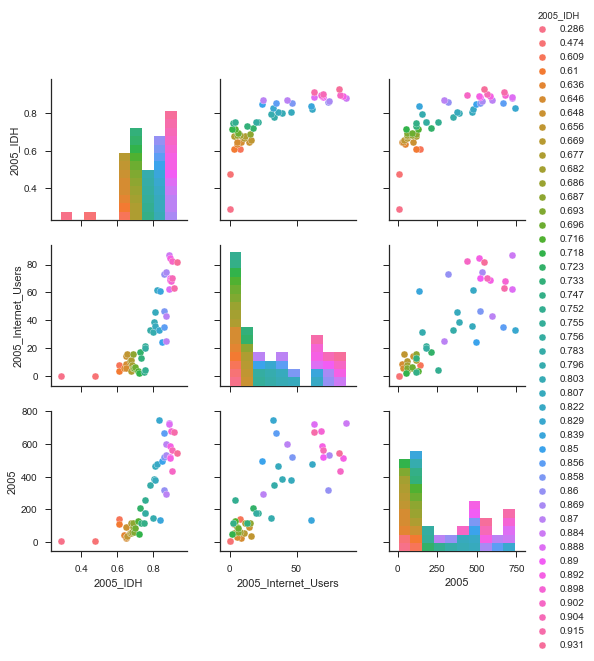

In [47]:
sns.set(style="ticks")

sns.pairplot(df4,hue="2005_IDH")#, hue="origin")#, x_vars=x_vars, y_vars=y_vars)

Ao compararmos os dois anos, mesmo com 2005 tendo um número menor de dados, percebemos que ambos possuem um comportamento, aparentemente, comum. Mostrando assim que desde de 2005 os atributos relacionados a comunicação e transporte já estavam tendendo a se relacionar com o IDH.

# Retas de tendências de 2005

Primeiro vamos relacionar o número de usuários na internet e IDH

Ajuste linear entre X3 e X4:
Coeficiente linear: -105.12429977097787
Coeficiente angular: 180.35573959910985


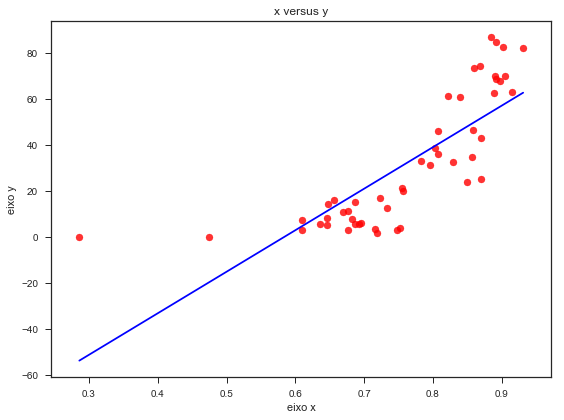

In [48]:
reta(df4['2005_IDH'], df4['2005_Internet_Users'])

Ajuste linear entre X3 e X4:
Coeficiente linear: -5.329620458440904
Coeficiente angular: 10.694089140727602


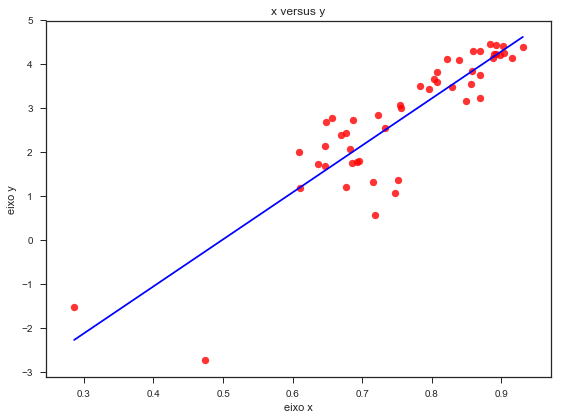

In [53]:
reta(df4['2005_IDH'], np.log(df4['2005_Internet_Users']))

In [49]:
df4['2005_IDH'].corr(df4['2005_Internet_Users'])

0.797616282826985

Agora vamos relacionar o transporte com o IDH

Ajuste linear entre X3 e X4:
Coeficiente linear: -868.8913665615505
Coeficiente angular: 1529.9600537651936


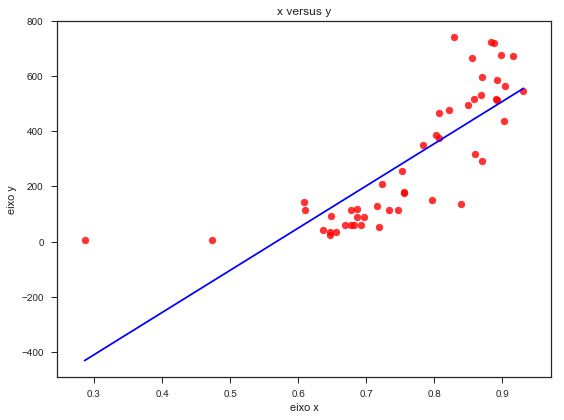

In [50]:
reta(df4['2005_IDH'], df4[2005])

Ajuste linear entre X3 e X4:
Coeficiente linear: -1.654118877009708
Coeficiente angular: 8.978974424822344


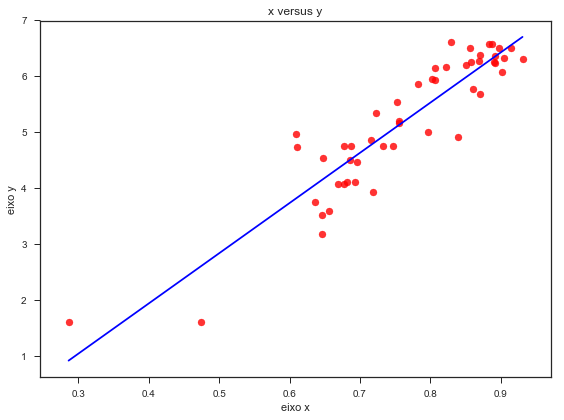

In [54]:
reta(df4['2005_IDH'], np.log(df4[2005]))

In [51]:
df4['2005_IDH'].corr(df4[2005])

0.8008486577767455

In [56]:
df4.to_csv("DataFram2.csv")
DataFrame2 = pd.read_csv("DataFram2.csv")

Ao compararmos as correlações presentes no ano de 2007 e com as de 2005, percebmos que elas são bem próximas, portanto podemos observar que elas ja possuiam um comportamento comum desde essa época.

## 2006

In [ ]:
df9.to_csv("DataFram1.csv")
DataFrame3 = pd.read_csv("DataFram1.csv")

In [58]:
hdi_2006 =  hdi_index[[2006]]
transp_2006 = transp_index[[2006]]
iu_2006 = internet_users_index[[2006]]

df5 = hdi_2006.join(iu_2006, how="inner",lsuffix = "_IDH", rsuffix="_Internet_Users")
df6 = df5.join(transp_2006,how="inner")
df6.head()

#"2006" refere-se a coluna do transporte

,2006_IDH,2006_Internet_Users,2006
geo,,,
Afghanistan,0.415,2.11,NaN
Albania,0.703,9.61,97.3
Algeria,0.690,7.38,NaN
Angola,0.454,1.50,NaN
Argentina,0.788,20.90,NaN


In [59]:
ct4 = pd.crosstab(df6["2006_IDH"], df2["2007_IDH"])
ct4.head()

2007_IDH,0.319,0.338,0.345,0.36,0.367,0.372,0.377,0.378,0.394,0.398,...,0.892,0.894,0.897,0.903,0.905,0.906,0.908,0.914,0.921,0.936
2006_IDH,,,,,,,,,,,,,,,,,,,,,
0.309,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.330,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.334,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.357,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.360,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
ct5 = pd.crosstab(df6["2006_Internet_Users"], df2["2007_Internet_Users"])
ct5.head()

2007_Internet_Users,0.217,0.24,0.37,0.376,0.7,0.75,0.81,0.91,0.966,1.41,...,75.2,77.2,78.8,78.9,80.8,82.0,85.0,85.8,86.9,90.6
2006_Internet_Users,,,,,,,,,,,,,,,,,,,,,
0.182,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.228,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.296,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.311,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.425,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
ct6 = pd.crosstab(df6[2006], df2[2007])
ct3.head()

2007,7.07,16.1,32.0,32.2,51.5,57.9,63.1,65.6,102.0,112.0,...,569.0,572.0,601.0,622.0,623.0,653.0,677.0,729.0,774.0,820.0
2005,,,,,,,,,,,,,,,,,,,,,
5.0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24.0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34.0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36.0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
42.5,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Ao observamos novamente a evolução dos dados, temos que o comportamento de quando o IDH aumentar, o percentual de usuários na internet e do transporte aumenta também.

# Comparando os Gráficos  de 2007, 2006 e 2005

C:\Users\User\Anaconda3\lib\site-packages\numpy\core\_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)
C:\Users\User\Anaconda3\lib\site-packages\numpy\core\_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)
C:\Users\User\Anaconda3\lib\site-packages\numpy\lib\function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\User\Anaconda3\lib\site-packages\numpy\lib\function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


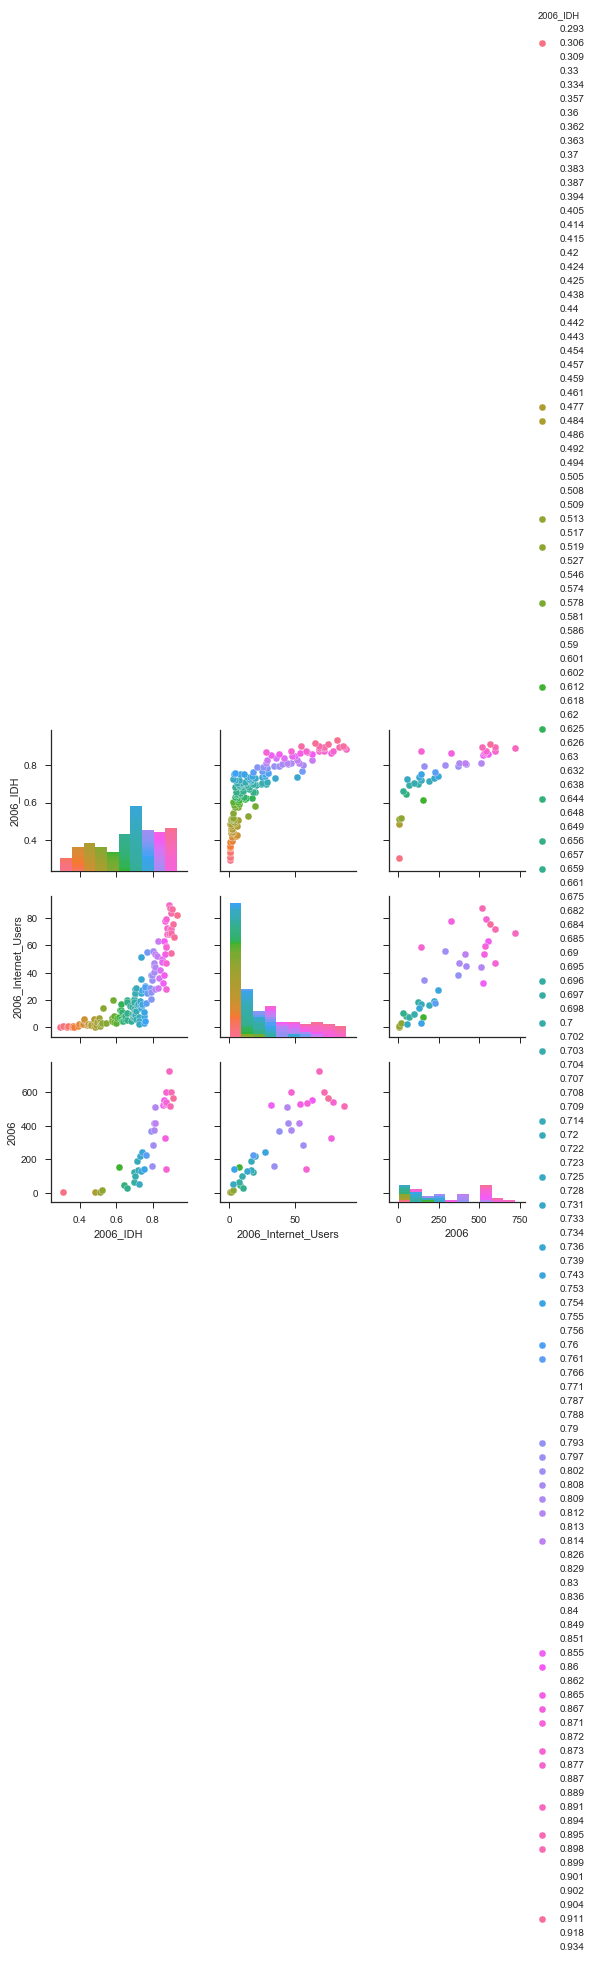

In [62]:
sns.set(style="ticks")

sns.pairplot(df6,hue="2006_IDH")#, hue="origin")#, x_vars=x_vars, y_vars=y_vars)

Agora que ja temos os gráficos dos de três anos consecutivos, podemos observar que ambos possuem um comportamento semelhante.
Deduzindo assim que esse comportamente está sendo constante ao longo desses anos.

# Retas de Tendência do ano de 2006

Novamente primeiramente relacionar o número de usuários na internet e IDH

Ajuste linear entre X3 e X4:
Coeficiente linear: -54.20978623814872
Coeficiente angular: 116.5823304810825


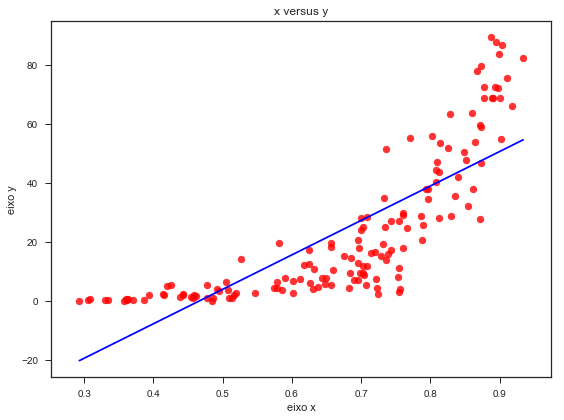

In [63]:
reta(df6['2006_IDH'], df6['2006_Internet_Users'])

Ajuste linear entre X3 e X4:
Coeficiente linear: -3.1412349496279997
Coeficiente angular: 8.232490080054962


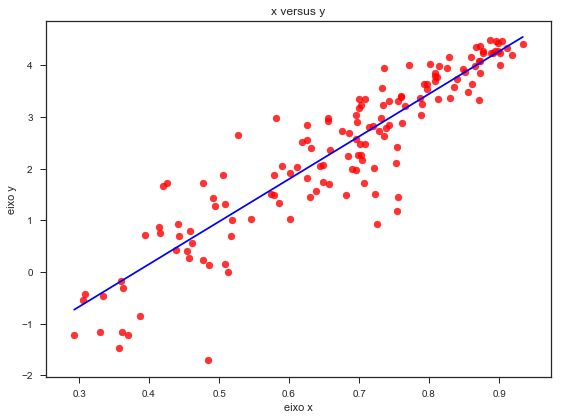

In [65]:
reta(df6['2006_IDH'], np.log(df6['2006_Internet_Users']))

In [66]:
df6['2006_IDH'].corr(df6['2006_Internet_Users'])

0.7995769733295871

Agora vamos relacionar, nevamente, o transporte com o IDH

Ajuste linear entre X3 e X4:
Coeficiente linear: -256.84003318867985
Coeficiente angular: 813.0833693417691


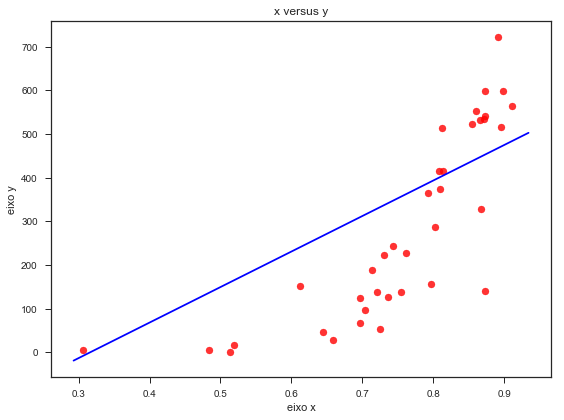

In [68]:
reta(df6['2006_IDH'], df6[2006])

Ajuste linear entre X3 e X4:
Coeficiente linear: 0.9621418163810214
Coeficiente angular: 6.1819236005254075


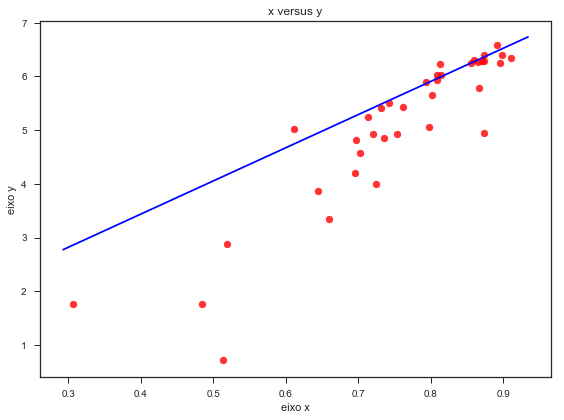

In [70]:
reta(df6['2006_IDH'], np.log(df6[2006]))

In [71]:
df6['2006_IDH'].corr(df6[2006])

0.7970541234257026

In [72]:
df6.to_csv("DataFram3.csv")
DataFrame2 = pd.read_csv("DataFram3.csv")

# Conclusão


Ao analisarmos os dados entre a comunicação, o transporte e o IDH, representados pelo número percentual de usuários na internet, número de carros, ônibus e caminhões por cada 1000 pessoas e os próprios números do IDH respectivamente, conseguimos observar que os dados tendem a ter uma relação aos longos dos anos de 2005, 2006 e 2007, onde aqueles países que apresentam um maior IDH, possuem um número superior nos outros dois atributos do que aqueles que possuem um IDH inferior. 

Essa relação pode ser explicado através de um fenômeno histórico chamado de globalização, que significa "o processo pelo qual empresas ou outras organizações desenvolvem influência internacional ou começam a operar em escala internacional" (segundo o https://en.oxforddictionaries.com/definition/).

Esse processo ocorreu desde o século XV e teve uma influência muito grande no desenvolvimento de todo o mundo. onde os meios de comunicação e de transporte melhoravam cada vez mais no mundo todo através da abertura de novos mercados, principalmente nos países desenvolvidos que acabavam fornecendo essa tecnologia atarvés de multinacionais e ganhando cada vez mais dinheiros com isso, e consequentimente, avançando cada vez mais nos desenvolvimento dessas tecnologias, uma vez que, o dinheiro que girava em torno dela estava aumentando.
